# Figure 3 Example

This notebook provides some example usage of the data release associated with figure 3 of [Abbott et al. (2018)](https://arxiv.org/abs/1805.11579).

This will use some plotting routines from [`ligo.skymap`](https://leo-singer.docs.ligo.org/ligo.skymap/), which is a `pip install` away.

In [1]:
!pip install ligo.skymap

    100% |████████████████████████████████| 1.2MB 434kB/s ta 0:00:011
    100% |████████████████████████████████| 1.6MB 247kB/s ta 0:00:011    84% |███████████████████████████     | 1.3MB 13.9MB/s eta 0:00:01
    100% |████████████████████████████████| 184kB 2.2MB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 21.6MB 23kB/s eta 0:00:011    74% |████████████████████████        | 16.2MB 8.6MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.7MB 33kB/s eta 0:00:011   30% |█████████▉                      | 4.2MB 5.8MB/s eta 0:00:02
    100% |████████████████████████████████| 4.0MB 110kB/s ta 0:00:011    50% |████████████████                | 2.0MB 8.7MB/s eta 0:00:01
    100% |████████████████████████████████| 7.5MB 69kB/s eta 0:00:011    55% |█████████████████▊              | 4.2MB 7.3MB/s eta 0:00:01
    100% |████████████████████

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

import healpy as hp

from astropy.coordinates import SkyCoord
from astropy import units as u

from ligo.skymap import io
from ligo.skymap import plot
from ligo.skymap.postprocess import find_greedy_credible_levels

Download and extract the relevant data.

In [2]:
public_dcc_url = 'https://dcc.ligo.org/public/0150/P1800061/009/'

!curl -O {public_dcc_url}"figure_3.tar.gz"
!tar -xvf figure_3.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1035k  100 1035k    0     0  1687k      0 --:--:-- --:--:-- --:--:-- 1686k
x figure_3/
x figure_3/discovery_skymap.fits.gz
x figure_3/updated_skymap.fits.gz
x figure_3/README.md


Load the FITS files.

In [3]:
discovery_skymap, discovery_metadata = io.read_sky_map('figure_3/discovery_skymap.fits.gz')
updated_skymap, updated_metadata = io.read_sky_map('figure_3/updated_skymap.fits.gz')

Location of the EM counterpart `SSS17a`.

In [4]:
SSS17a = SkyCoord(197.4503*u.deg, -23.3815*u.deg)

## Credible Intervals

Calculate credible intervals from the posteriors.

In [5]:
discovery_cl = find_greedy_credible_levels(discovery_skymap)
updated_cl = find_greedy_credible_levels(updated_skymap)

In [6]:
discovery_area = int(np.round(np.sum(discovery_cl <= 0.9) * hp.nside2pixarea(hp.npix2nside(len(discovery_skymap)), degrees=True)))
updated_area = int(np.round(np.sum(updated_cl <= 0.9) * hp.nside2pixarea(hp.npix2nside(len(updated_skymap)), degrees=True)))

print("Area of 90% credible region from initial analysis: {} sq. deg.".format(discovery_area))
print("Area of 90% credible region from updated analysis: {} sq. deg.".format(updated_area))

Area of 90% credible region from initial analysis: 28 sq. deg.
Area of 90% credible region from updated analysis: 16 sq. deg.


## Sky Map

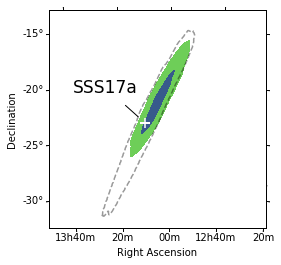

In [7]:
fig = plt.figure()
ax = plt.axes(projection='astro zoom', center='13h05m -23d', radius='10deg')

ax.coords['ra'].set_major_formatter('hh:mm')

ax.contour_hpx(discovery_cl, levels=[0.9], colors='k', alpha=0.4, linestyles='--')
ax.contourf_hpx(updated_cl, levels=[0, 0.5, 0.9])

ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

xytext = (SSS17a.ra.deg + 7, SSS17a.dec.deg + 3)
ax.annotate('SSS17a', xy=(SSS17a.ra.deg, SSS17a.dec.deg), xytext=xytext, fontsize=17,
            arrowprops=dict(arrowstyle="-", shrinkA=10, shrinkB=10),
            xycoords=ax.get_transform('world'), textcoords=ax.get_transform('world'))

ax.scatter(SSS17a.ra.deg, SSS17a.dec.deg, s=100, transform=ax.get_transform('world'), marker='+', color='white');